In [1]:
from CheckSteepestDescent_partial import *
from CheckMediumScale_init import *

In [2]:
P, q, r = quadratic_problem2d(np.array([2, 1]))

cost = get_cost(P, q, r)
gradient = get_gradient(P, q)
hessian = get_hessian(P)

In [3]:
def backtracking(cost, gradient, x, sigma_init=2, c=0.2, roo=0.5):
    dk = -gradient(x)
    f_x = cost(x)
    while cost(x + sigma_init*dk) > f_x  - c*sigma_init*dk@dk:
        sigma_init = roo*sigma_init
    return sigma_init

def newton(x0,cost,gradient, hessian, epsilon=1e-2, maxiter=100000):
    xlist = [x0] # list of points
    flist = [cost(x0)] # list of cost function  values
    nlist = [np.linalg.norm(gradient(x0))] # list of gradient norm values
    it = 0

    step = backtracking(cost, gradient, x0)
    x = xlist[-1]
    grad = gradient(x)
   
    xk = x - step*np.linalg.inv(hessian(x)).dot(grad)
    xlist.append(xk)
    flist.append(cost(xk))
    nlist.append(np.linalg.norm(gradient(xk)))
    while np.abs(flist[-2] - flist[-1]) > epsilon:
        x = xlist[-1]
        grad = gradient(x)
        step = backtracking(cost, gradient, x0)
        xk = x - step*np.linalg.inv(hessian(x)).dot(grad)
        xlist.append(xk)
        flist.append(cost(xk))
        nlist.append(np.linalg.norm(gradient(xk)))
        it += 1
        if it > maxiter:
            break
    return xlist,flist,nlist


# # Méthode de backtracking
# def backtrack(x, d, gradient, cost, sigma_init=1.0, rho=0.5, alpha=0.2):
#     sigma = sigma_init
#     grad_x = gradient(x)
#     while cost(x + sigma * d) > cost(x) + alpha * sigma * np.dot(grad_x, d):
#         sigma *= rho
#     return sigma

# def newton_descent(x0, cost, gradient, hessian, prec=1e-10, max_iteration=100000):
#     x = np.copy(x0)
#     xlist = [x]
#     flist = [cost(x)]
#     nlist = [np.linalg.norm(gradient(x))]

#     # Critère de convergence basé sur la différence des fonctions de coût
#     k = 0
#     grad = gradient(x)
#     h = hessian(x)
#     h_inv = np.linalg.inv(h)
#     direction = np.dot(h_inv,grad)
#     d = -direction
#     sigma_k = backtrack(x, d, gradient, cost)
#     x = x + sigma_k * d

#     xlist.append(x)
#     flist.append(cost(x))
#     nlist.append(np.linalg.norm(gradient(x)))
#     k += 1
#     while abs(flist[-1] - flist[-2]) > prec:
#         if k == max_iteration:
#             print('Convergence atteinte à {k} itération')
#             break
#         grad = gradient(x)
#         h = hessian(x)
#         h_inv = np.linalg.inv(h)
#         direction = np.dot(h_inv,grad)
#         d = -direction
#         sigma_k = backtrack(x, d, gradient, cost)
#         x = x + sigma_k * d

#         xlist.append(x)
#         flist.append(cost(x))
#         nlist.append(np.linalg.norm(gradient(x)))
#         k += 1
    
#     return xlist, flist, nlist


# Probleme quadratique

In [12]:
def visualize_newton(cost, gradient, hessian, xstar, x0=None,  epsilon=1e-4, maxiter=100000):
    fmin  = cost(xstar)

    #grid
    ax= xstar[0]
    bx = xstar[0]
    ay= xstar[1]
    by = xstar[1]

    for test in range(2):
        if x0 is None:
            x0 = np.copy(xstar) + 2.*(np.random.rand(2)-.5)
        #
        fig = plt.figure(1, figsize=(19,5))
        xlist,flist,nlist =  newton(x0,cost,gradient, hessian, epsilon, maxiter)
        flist = np.asarray(flist)
        xlist = np.asarray(xlist)
        #
        plt.subplot(1,3,1)
        plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
        #    #
        ax = np.min((xlist[:,0].min(),ax))-.1
        bx = np.max((xlist[:,0].max(),bx))+.1
        ay = np.min((xlist[:,1].min(),ay))-.1
        by = np.max((xlist[:,1].max(),by))+.1
        
        plt.subplot(1,3,2)
        plt.semilogy(range(len(flist)),flist-fmin+1e-16)
        plt.xlabel('iterations')
        plt.ylabel(r'$f(x^k)$')
        
        plt.subplot(1,3,3)
        plt.semilogy(nlist,':')
        plt.xlabel('iterations')
        plt.ylabel(r'$\nabla f(x^k)$')
        
        
    # 
    xgrid = np.arange(ax,bx,(bx-ax)/50)
    ygrid = np.arange(ay,by,(by-ay)/50)
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

    plt.subplot(1,3,1)
    plt.contour(X, Y, Z,21)


    plt.plot(xstar[0], xstar[1],'*',label='points')
    plt.show()



xstar = np.linalg.solve(P, -q) 

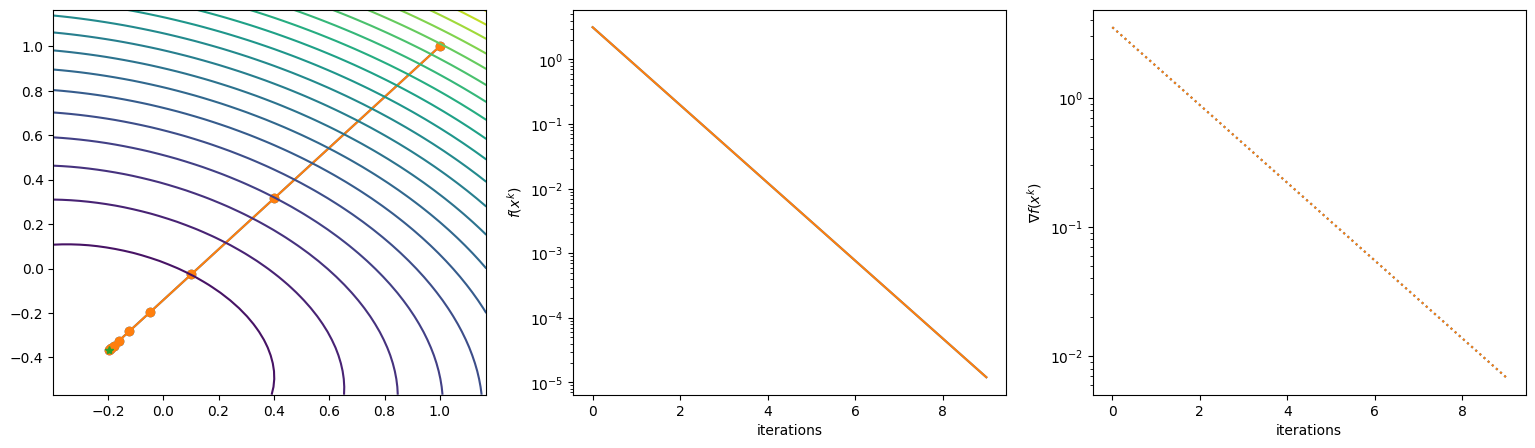

In [6]:
visualize_newton(cost, gradient, hessian, xstar, x0=np.ones(2))

# Fonction mediateur

In [75]:
alpha = lambda x  : x@np.array([1, 3]) - .1
beta = lambda x : x@np.array([1, -3]) - .1
gamma = lambda x: -x@np.array([-1, 0]) - .1

cost = lambda x : np.exp(alpha(x)) + np.exp(beta(x)) + np.exp(gamma(x))

gradient = lambda x : np.array([np.exp(alpha(x)) + np.exp(beta(x)) - np.exp(gamma(x)), 3*np.exp(alpha(x)) - 3*np.exp(beta(x))])

hessian = lambda x : np.array(
    [[np.exp(alpha(x)) + np.exp(beta(x)) + np.exp(gamma(x)), 3*np.exp(alpha(x)) - 3*np.exp(beta(x))], 
     [3*np.exp(alpha(x)) - 3*np.exp(beta(x)),                9*np.exp(alpha(x)) + 9*np.exp(beta(x))]]
     )

xstar = np.array([-np.log(2)/2 , 0])

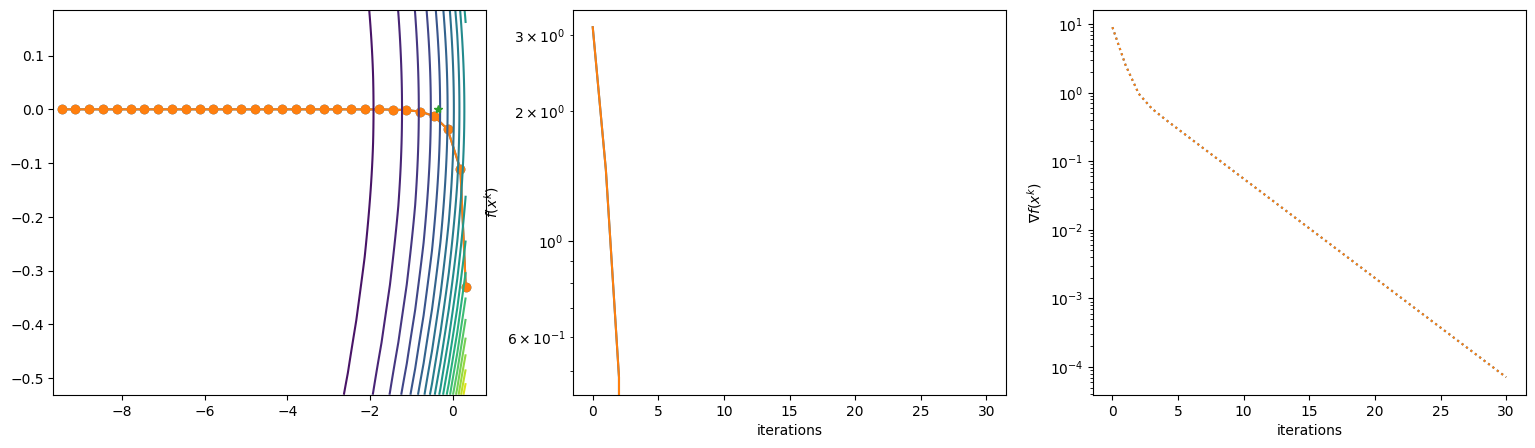

In [76]:
visualize_newton(cost, gradient, hessian, xstar)


# Log Barriere

In [28]:
# 1. generation of A,b et c
m = 500
n = 2
scale = 0.2
x0 = np.ones(n)
A, b, c = create_problem(m, n, scale, x0)



def get_cost(A, b, c):
    
    def cost(x):
        h_x = b - np.dot(A.T, x)
        if np.any(h_x <= 0):
            return np.inf
        cout = np.dot(c, x) - np.sum(np.log(b - np.dot(A.T, x)))
        return cout
    return cost



def get_gradient(A, b, c):
    def gradient(x):
        h_x = b - np.dot(A.T, x)
        if np.any(h_x <= 0):
            return np.inf
        grad = c + np.dot(A, 1/(b - np.dot(A.T, x)))
        return grad
    return gradient


def get_hessian(A, b, c):
    def hessian(x):
        h_x = b - np.dot(A.T, x)
        if np.any(h_x <= 0):
            return np.inf
        hess = A @ np.diag(1/(b - np.dot(A.T, x))) @ A.T
        return hess
    
    # def hessian(x):
    #     h=np.zeros((len(x),len(x)))
    #     for i in range(len(b)):
    #         h+=np.outer(A[:,i],A[:,i])/((b[i]-A[:,i].T@x)**2)
    #     return h
    return hessian


cost = get_cost(A, b, c)
gradient = get_gradient(A, b, c)
hessian = get_hessian(A, b, c)     


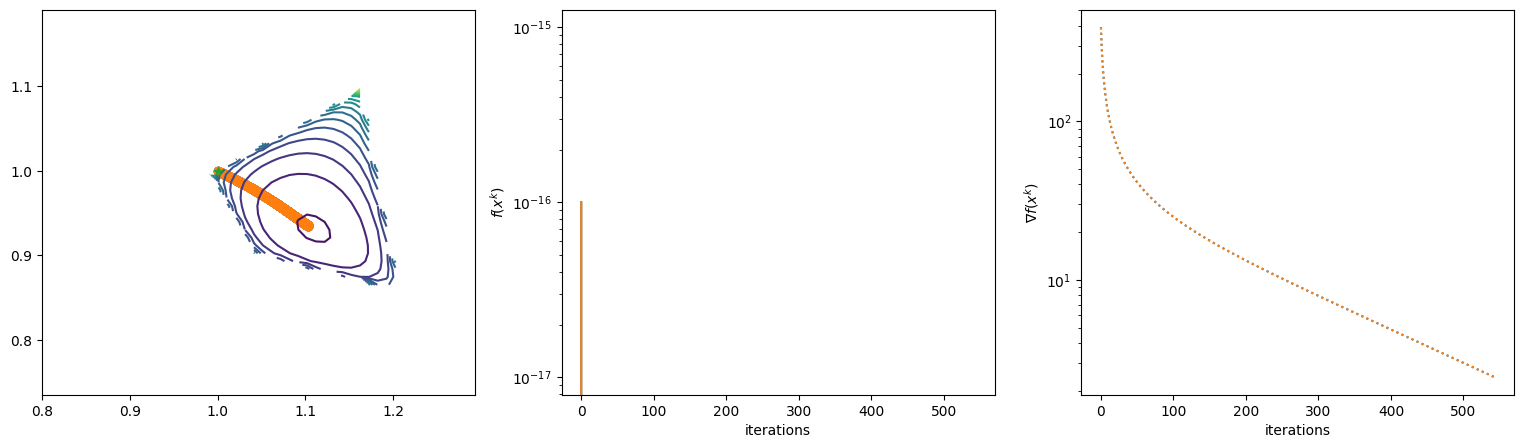

In [34]:
visualize_newton(cost, gradient, hessian, xstar=x0, x0=np.ones(2))


array([-0.29438815, -0.63587774])